## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report

## Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dibimbing/Day 18 - Exploring Machine Learning Models with Python (Supervised) Part II/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

## Data Preprocessing

In [6]:
#exclude rows with total charges columncontain white space 
df = df.loc[~df['TotalCharges'].str.contains(' ')] 

In [7]:
#totalcharges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Data Understanding

## Statistical summary

In [9]:
# group column names based on type

cats = ['customerID','gender','Partner','Dependents','PhoneService',
        'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
        'Contract','PaperlessBilling','PaymentMethod','Churn']

nums = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [10]:
# numerical statistical sumary
df[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
* Overall, the minimum and maximum values make sense for each column
* `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
* Mean ~ 50% (Median) in `tenure`, `MonthlyCharges`, and `TotalCharges` column, indicating somewhat a skew distribution

In [11]:
# describe method on categorical data
df[cats].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [12]:
# showing the precise value counts
for col in cats:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

##Target

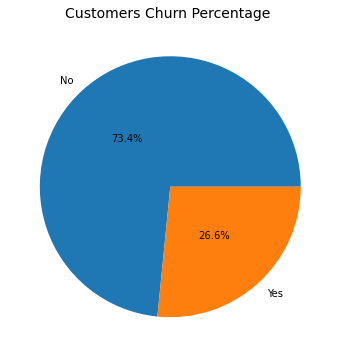

In [13]:
pie, ax = plt.subplots(figsize=[10,6])
labels = df["Churn"].value_counts().keys()
plt.pie(x=df["Churn"].value_counts(), autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Customers Churn Percentage ", fontsize=14);
pie.savefig("Customers Churn Percentage.png")

In [14]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Observation : Target is imbalance

#Univariate Analysis

## Boxplot to detect outliers

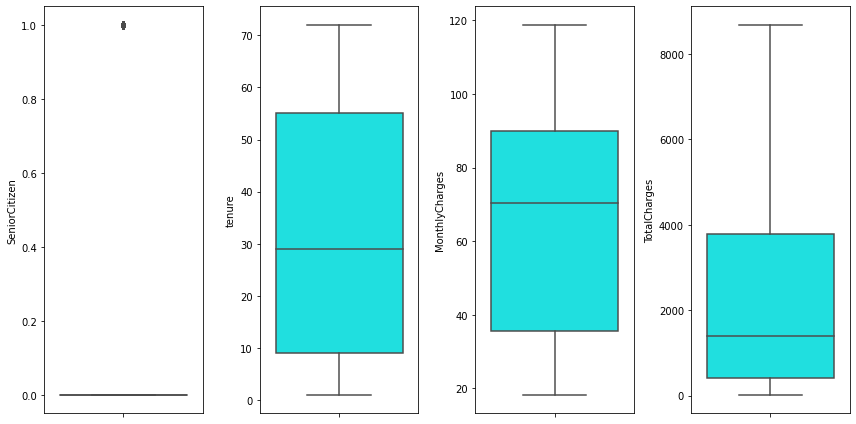

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Obervation:
1. There is one outlier in the `SeniorCitizen` column (value = 1). But because this column is boolean, it doesn't need to be considered
2. Column with continuous value does not have data outliers

## KDE plot for knowing the distribution form

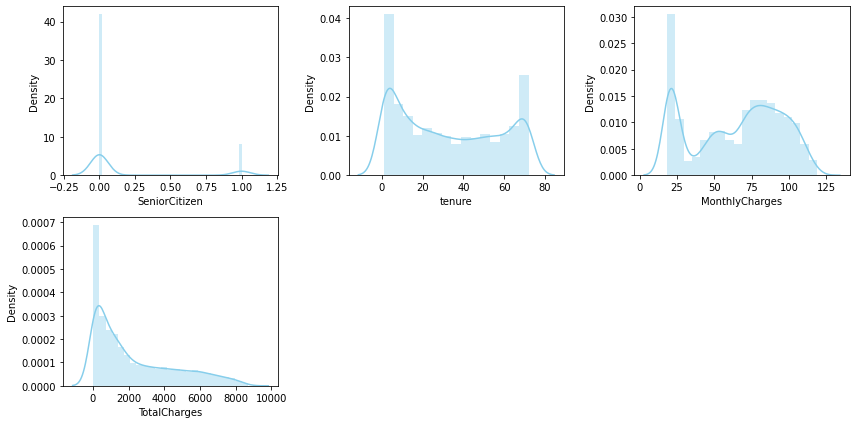

In [16]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
2. The true continuous numeric features: `tenure`, `MonthlyCharges`, and `TotalCharges` are somewhat skew
3. In terms of the target variable, `SeniorCitizen = 0` is more frequent in the dataset.

# Bivariate Analysis

##Demographic
Gender, SeniorCitizen, Partners, Dependents

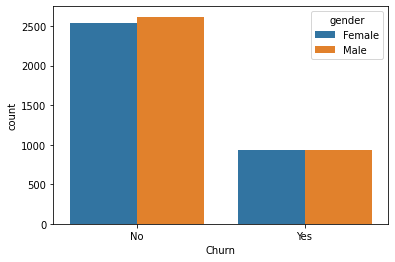

In [17]:
# gender
sns.countplot(data=df,
            x='Churn',
            hue='gender')

Observation :
* Both Male & Female have the same tendency to leave, so neither one is dominant


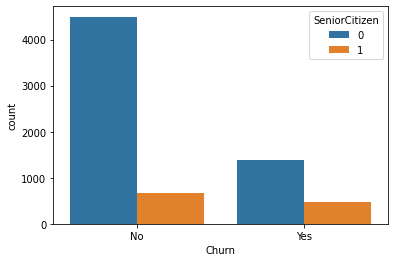

In [18]:
# SeniorCitizen
sns.countplot(data=df,
            x='Churn',
            hue='SeniorCitizen')

Observation :     
*   Customers who left are dominated by young generations
*   Even though it is dominated by young people, the percentage of customers left from the elderly is very significant



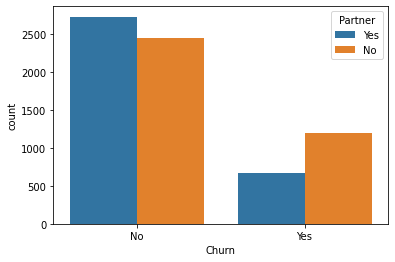

In [19]:
# Partner
sns.countplot(data=df,
            x='Churn',
            hue='Partner')

Observation :     
Customers who do not have a partner left very significant


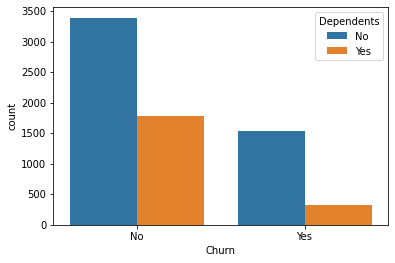

In [20]:
# Dependents
sns.countplot(data=df,
            x='Churn',
            hue='Dependents')

Observation :    
Customers without dependents left very significant


##Account Information
Tenure, Contract, MonthlyCharges, TotalCharges




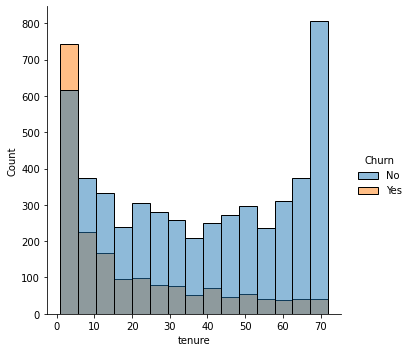

In [21]:
# tenure
sns.displot(x=df['tenure'],
            hue=df['Churn'])

Observation :
Customers with longer tenure tend to stay, which also affects Total Charges and Monthly Charges 


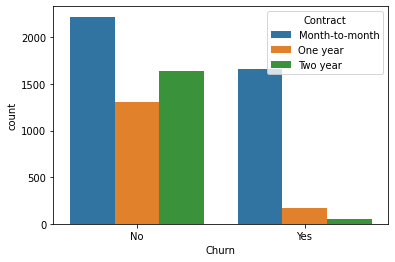

In [22]:
# Contract affect Churn?
sns.countplot(data=df,
            x='Churn',
            hue='Contract')

Observation :

Customers with Month-to-month contracts leave significantly





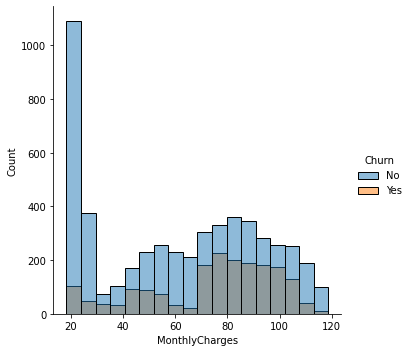

In [23]:
# MonthlyCharges
sns.displot(x=df['MonthlyCharges'],
            hue=df['Churn'])

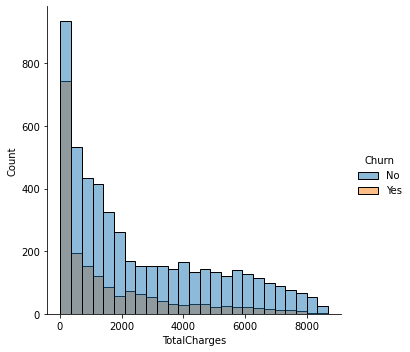

In [24]:
# TotalCharges
sns.displot(x=df['TotalCharges'],
            hue=df['Churn'])

##Services
PhoneServices, Multiplelines, InternetService, OnlineSecurity, Online Backup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

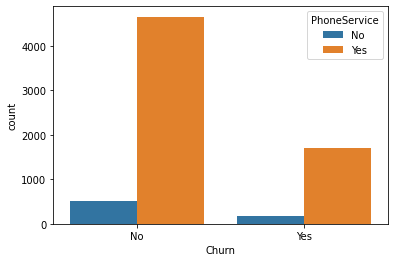

In [25]:
# PhoneServices
sns.countplot(data=df,
            x='Churn',
            hue='PhoneService')

Customers who use Telephone Service have left significantly

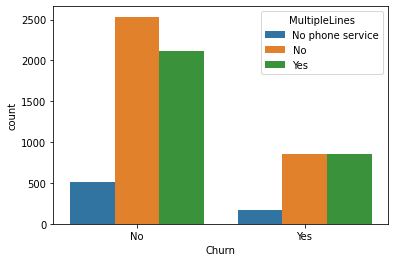

In [26]:
# Multiplelines
sns.countplot(data=df,
            x='Churn',
            hue='MultipleLines')

Customers who use the Multiple Lines service and do not use the Multiple Lines service have left significantly


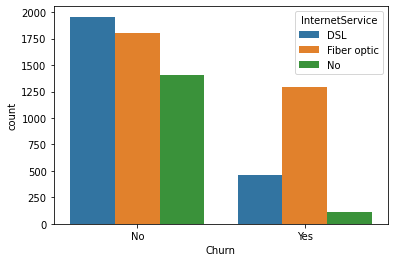

In [27]:
# InternetService
sns.countplot(data=df,
            x='Churn',
            hue='InternetService')

Customers using fiber optic services have left significantly


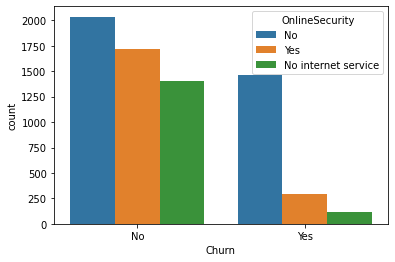

In [28]:
# OnlineSecurity
sns.countplot(data=df,
            x='Churn',
            hue='OnlineSecurity')

Customers who do not have Online Security services have left significantly


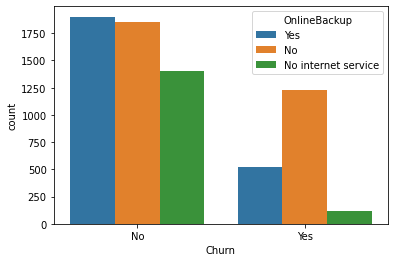

In [29]:
# OnlineBackup
sns.countplot(data=df,
            x='Churn',
            hue='OnlineBackup')

Customers who do not use the Online Backup service have left significantly

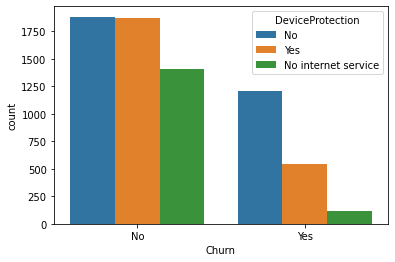

In [30]:
# DeviceProtection
sns.countplot(data=df,
            x='Churn',
            hue='DeviceProtection')

Customers who do not use Device Protection services have left significantly

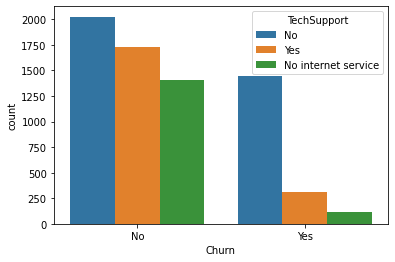

In [31]:
# TechSupport
sns.countplot(data=df,
            x='Churn',
            hue='TechSupport')

Customers who do not use Tech Support services have left significantly

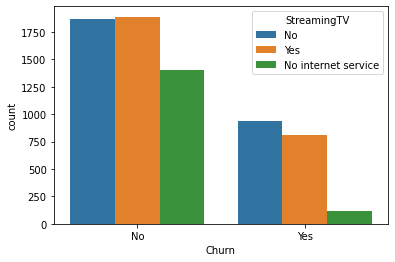

In [32]:
# StreamingTV
sns.countplot(data=df,
            x='Churn',
            hue='StreamingTV')


*   Customers who have left is dominated by those who do not have StreamingTV services.
*   However, it can also be seen that customers using Streaming TV services have left very significant




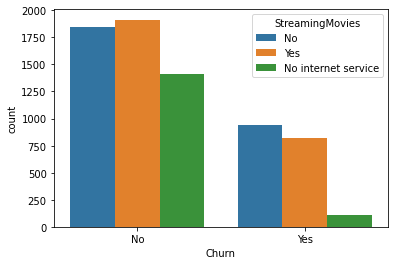

In [33]:
# StreamingMovies
sns.countplot(data=df,
            x='Churn',
            hue='StreamingMovies')


*   Customers who left are dominated by customers who do not use streaming movies services
*   However, it can also be seen that customers using Streaming Movies service have left significantly



#Handling Category

###Label encoding
yang 2 value di label encoding

In [34]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int8   
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int8   
 4   Dependents        7032 non-null   int8   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int8   
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


###One Hot Encoding

In [37]:
df =pd.get_dummies(data=df,columns=['MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod'],drop_first=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,29.85,29.85,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,42.30,1840.75,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,70.70,151.65,1,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int8   
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int8   
 4   Dependents                             7032 non-null   int8   
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int8   
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int8   
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [39]:
df = df.drop(['customerID'], axis = 1)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,29.85,29.85,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,34,1,56.95,1889.50,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,53.85,108.15,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,45,0,42.30,1840.75,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,1,70.70,151.65,1,0,...,0,0,0,0,0,0,1,0,1,0


# balanced data

In [41]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### Balancing Data

In [42]:
from imblearn import under_sampling, over_sampling

In [43]:
sm = over_sampling.SMOTE(random_state=42)

X = df.drop(['Churn'],axis = 1)
Y = df['Churn']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (7032, 30)
Shape of X after SMOTE: (10326, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [44]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

data already balanced

### Split Dataset

In [45]:
X = df.drop(['Churn'],axis = 1)
Y = df['Churn']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

#Modeling

##Define Model

In [47]:
cly = [LogisticRegression(random_state=42),
      RandomForestClassifier(random_state=42),
      XGBClassifier(random_state=42),
       KNeighborsClassifier(),
       DecisionTreeClassifier(random_state=42),
       GaussianNB()]

df = pd.DataFrame(columns = ['Model', 'Accuracy',])
df

,Model,Accuracy


##Evaluation

In [48]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    
    # acc
    acc = accuracy_score(y_test, preds)
    
    df = df.append({'Model': method, 
                    'Accuracy': acc},
                     ignore_index=True)

In [49]:
df

,Model,Accuracy
0,LogisticRegression,0.826234
1,RandomForestClassifier,0.840271
2,XGBClassifier,0.832527
3,KNeighborsClassifier,0.772023
4,DecisionTreeClassifier,0.773959
5,GaussianNB,0.791384
